In [0]:
# imports 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns

# read in the datasets to pandas dataframes 
userhome = 'dbfs:/user/skim658@gwu.edu'

redDF = spark.read.parquet(userhome + '/final-project/reddf.parquet')
display(redDF.summary())
redDF = redDF.toPandas()

whiteDF = spark.read.parquet(userhome + '/final-project/whitedf.parquet')
whiteDF = whiteDF.toPandas()

summary,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599
mean,8.319637273295838,0.5278205128205131,0.2709756097560964,2.5388055034396517,0.08746654158849257,15.874921826141339,46.46779237023139,0.9967466791744831,3.311113195747343,0.6581488430268921,10.422983114446502,5.6360225140712945
stddev,1.7410963181276948,0.17905970415353525,0.19480113740531824,1.40992805950728,0.047065302010090085,10.46015696980971,32.89532447829907,0.0018873339538427265,0.15438646490354271,0.1695069795901101,1.0656675818473935,0.8075694397347051
min,4.6,0.12,0.0,0.9,0.012,1.0,6.0,0.99007,2.74,0.33,8.4,3
25%,7.1,0.39,0.09,1.9,0.07,7.0,22.0,0.9956,3.21,0.55,9.5,5
50%,7.9,0.52,0.26,2.2,0.079,14.0,38.0,0.99675,3.31,0.62,10.2,6
75%,9.2,0.64,0.42,2.6,0.09,21.0,62.0,0.99784,3.4,0.73,11.1,6
max,15.9,1.58,1.0,15.5,0.611,72.0,289.0,1.00369,4.01,2.0,14.9,8


## Initial Exploratory Analysis

Poke around the data and look for any general relationships between data points. Goal is to develop an initial feel for the data and generate a hypotheses to explore further.

## Red vs. White Wine Quality

In [0]:
# get the mean quality of the red vs white wines
means = {'color': ['red', 'white'], 'quality_mean': [redDF['quality'].mean(), whiteDF['quality'].mean()]}
meanDF = pd.DataFrame(means)
display(meanDF)

color,quality_mean
red,5.6360225140712945
white,5.87790935075541


Out[3]:

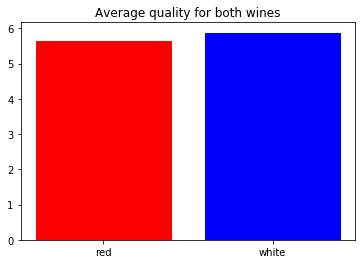

Text(0.5, 1.0, 'Average quality for both wines')

In [0]:
bar = plt.bar(meanDF['color'], meanDF['quality_mean'])
bar[0].set_color('red')
bar[1].set_color('blue')
plt.title('Average quality for both wines')

## Red vs. White Wine Features

Out[3]:

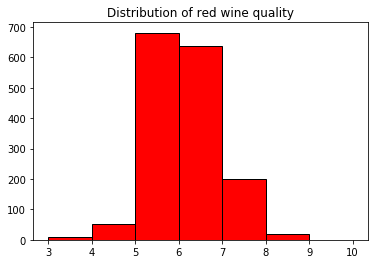

Text(0.5, 1.0, 'Distribution of red wine quality')

In [0]:
plt.hist(redDF['quality'], color = 'red', edgecolor = 'black', bins = [3, 4, 5, 6, 7, 8, 9, 10])
plt.title('Distribution of red wine quality')

Out[2]:

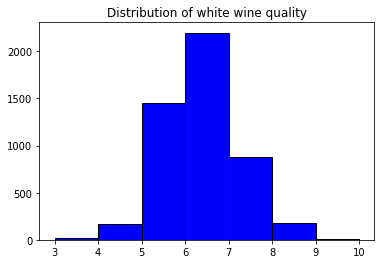

Text(0.5, 1.0, 'Distribution of white wine quality')

In [0]:
plt.hist(whiteDF['quality'], color = 'blue', edgecolor = 'black', bins = [3, 4, 5, 6, 7, 8, 9, 10])
plt.title('Distribution of white wine quality')

Out[6]:

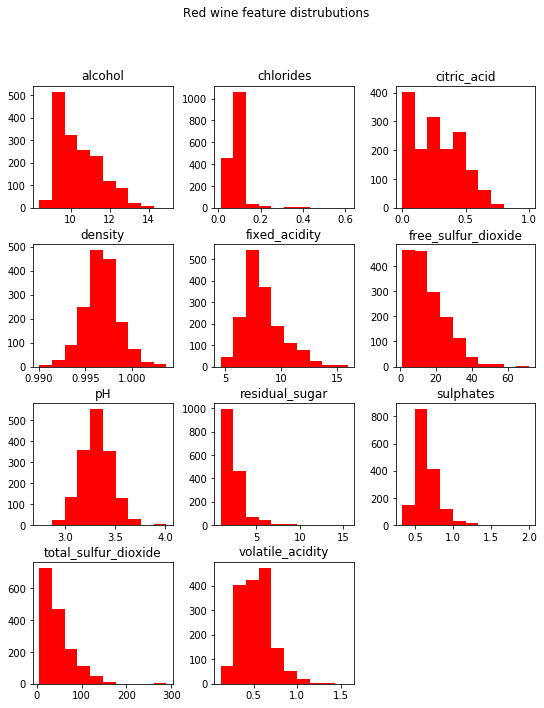

Text(0.5, 0.98, 'Red wine feature distrubutions')

In [0]:
redDF.drop('quality', axis = 1).hist(figsize = (9, 11), color = 'red', grid = False)
plt.suptitle('Red wine feature distrubutions')

Out[7]:

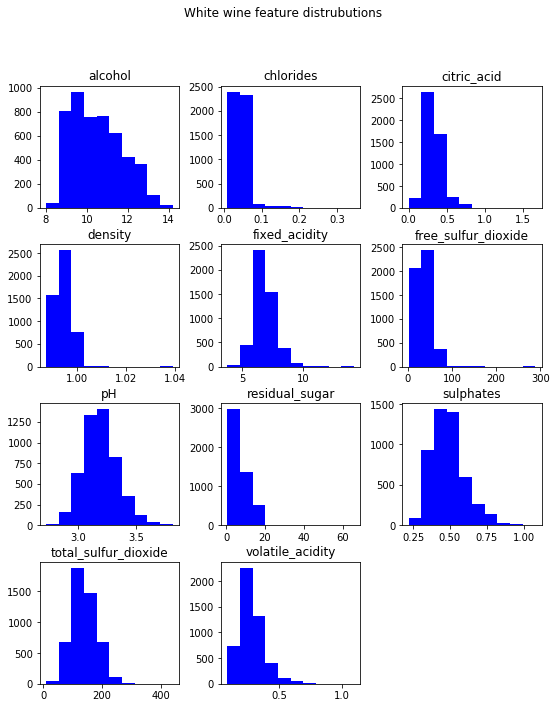

Text(0.5, 0.98, 'White wine feature distrubutions')

In [0]:
whiteDF.drop('quality', axis = 1).hist(figsize = (9, 11), color = 'blue', grid = False)
plt.suptitle('White wine feature distrubutions')

In [0]:
redDF.columns

Out[8]: Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol', 'quality'],
 dtype='object')

Out[9]:

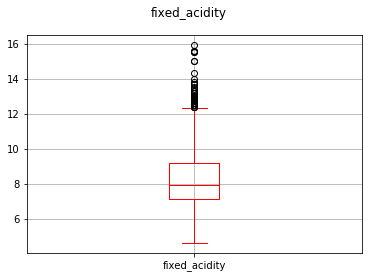

Text(0.5, 0.98, 'fixed_acidity')

In [0]:
redDF.boxplot(['fixed_acidity'], color = 'red')
plt.suptitle('fixed_acidity')

Out[10]:

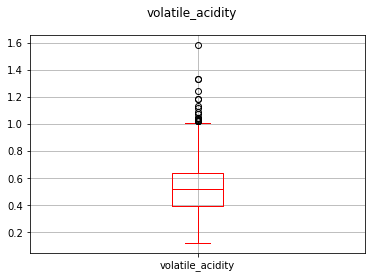

Text(0.5, 0.98, 'volatile_acidity')

In [0]:
redDF.boxplot(['volatile_acidity'], color = 'red')
plt.suptitle('volatile_acidity')

Out[11]:

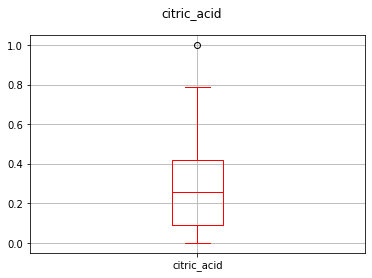

Text(0.5, 0.98, 'citric_acid')

In [0]:
redDF.boxplot(['citric_acid'], color = 'red')
plt.suptitle('citric_acid')

Out[12]:

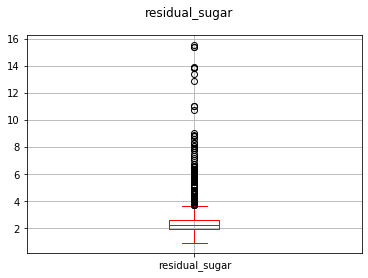

Text(0.5, 0.98, 'residual_sugar')

In [0]:
redDF.boxplot(['residual_sugar'], color = 'red')
plt.suptitle('residual_sugar')

Out[13]:

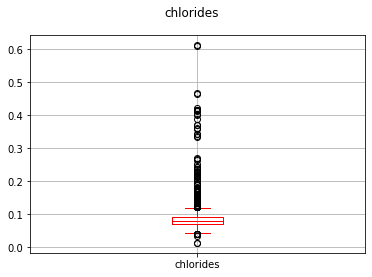

Text(0.5, 0.98, 'chlorides')

In [0]:
redDF.boxplot(['chlorides'], color = 'red')
plt.suptitle('chlorides')

Out[14]:

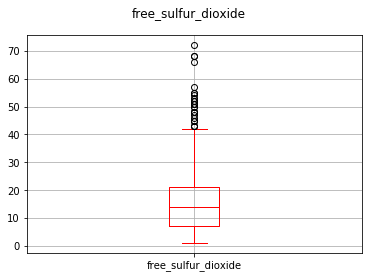

Text(0.5, 0.98, 'free_sulfur_dioxide')

In [0]:
redDF.boxplot(['free_sulfur_dioxide'], color = 'red')
plt.suptitle('free_sulfur_dioxide')

Out[15]:

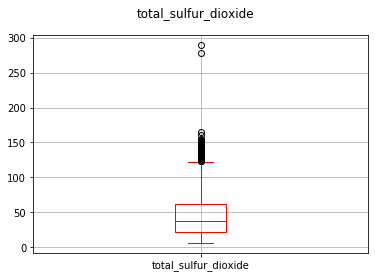

Text(0.5, 0.98, 'total_sulfur_dioxide')

In [0]:
redDF.boxplot(['total_sulfur_dioxide'], color = 'red')
plt.suptitle('total_sulfur_dioxide')

Out[16]:

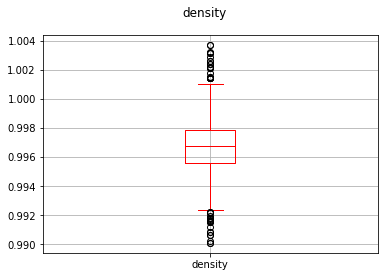

Text(0.5, 0.98, 'density')

In [0]:
redDF.boxplot(['density'], color = 'red')
plt.suptitle('density')

Out[17]:

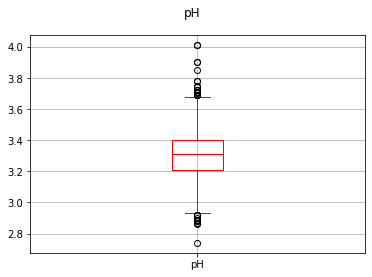

Text(0.5, 0.98, 'pH')

In [0]:
redDF.boxplot(['pH'], color = 'red')
plt.suptitle('pH')

Out[18]:

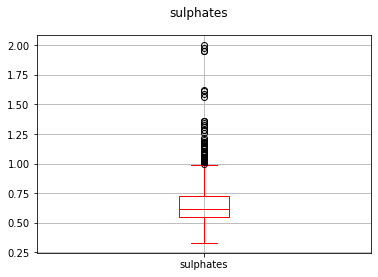

Text(0.5, 0.98, 'sulphates')

In [0]:
redDF.boxplot(['sulphates'], color = 'red')
plt.suptitle('sulphates')

Out[19]:

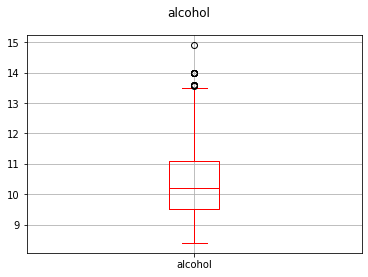

Text(0.5, 0.98, 'alcohol')

In [0]:
redDF.boxplot(['alcohol'], color = 'red')
plt.suptitle('alcohol')

In [0]:
whiteDF.columns

Out[20]: Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol', 'quality'],
 dtype='object')

Out[21]:

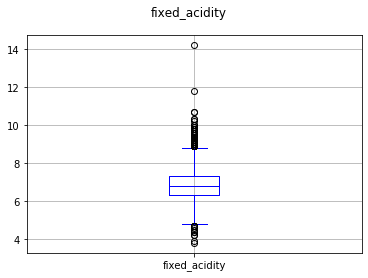

Text(0.5, 0.98, 'fixed_acidity')

In [0]:
whiteDF.boxplot(['fixed_acidity'], color = 'blue')
plt.suptitle('fixed_acidity')

Out[22]:

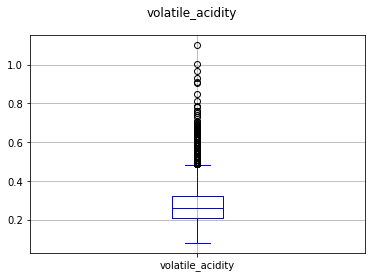

Text(0.5, 0.98, 'volatile_acidity')

In [0]:
whiteDF.boxplot(['volatile_acidity'], color = 'blue')
plt.suptitle('volatile_acidity')

Out[23]:

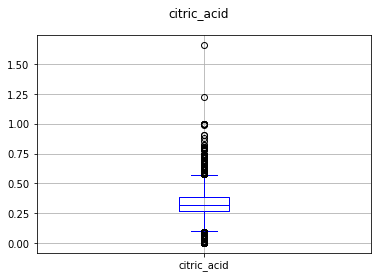

Text(0.5, 0.98, 'citric_acid')

In [0]:
whiteDF.boxplot(['citric_acid'], color = 'blue')
plt.suptitle('citric_acid')

Out[24]:

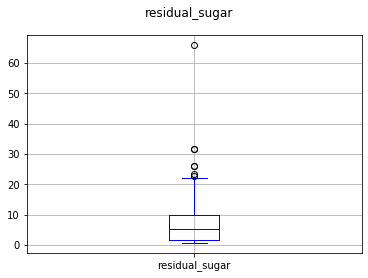

Text(0.5, 0.98, 'residual_sugar')

In [0]:
whiteDF.boxplot(['residual_sugar'], color = 'blue')
plt.suptitle('residual_sugar')

Out[25]:

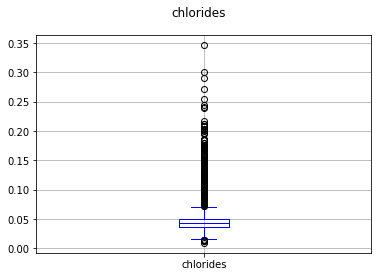

Text(0.5, 0.98, 'chlorides')

In [0]:
whiteDF.boxplot(['chlorides'], color = 'blue')
plt.suptitle('chlorides')

Out[26]:

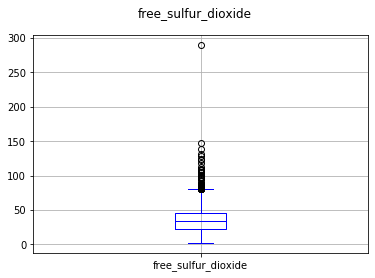

Text(0.5, 0.98, 'free_sulfur_dioxide')

In [0]:
whiteDF.boxplot(['free_sulfur_dioxide'], color = 'blue')
plt.suptitle('free_sulfur_dioxide')

Out[27]:

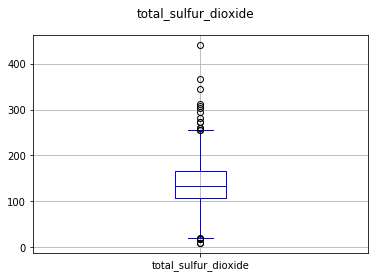

Text(0.5, 0.98, 'total_sulfur_dioxide')

In [0]:
whiteDF.boxplot(['total_sulfur_dioxide'], color = 'blue')
plt.suptitle('total_sulfur_dioxide')

Out[28]:

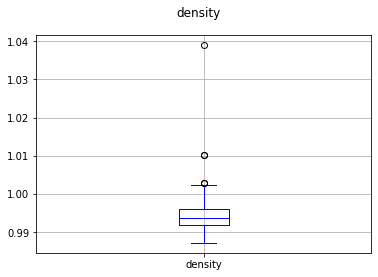

Text(0.5, 0.98, 'density')

In [0]:
whiteDF.boxplot(['density'], color = 'blue')
plt.suptitle('density')

Out[29]:

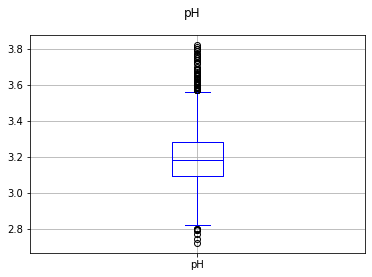

Text(0.5, 0.98, 'pH')

In [0]:
whiteDF.boxplot(['pH'], color = 'blue')
plt.suptitle('pH')

Out[30]:

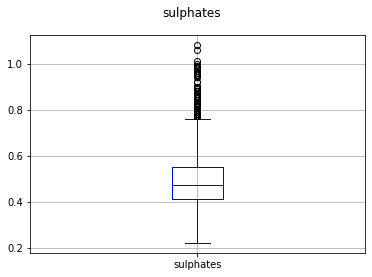

Text(0.5, 0.98, 'sulphates')

In [0]:
whiteDF.boxplot(['sulphates'], color = 'blue')
plt.suptitle('sulphates')

Out[31]:

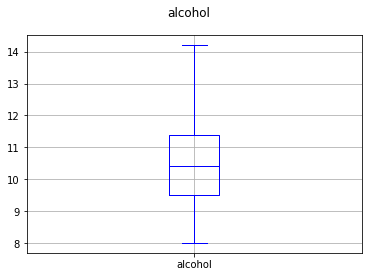

Text(0.5, 0.98, 'alcohol')

In [0]:
whiteDF.boxplot(['alcohol'], color = 'blue')
plt.suptitle('alcohol')

## Scale the Data

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledRedDF = pd.DataFrame(scaler.fit_transform(redDF), columns = redDF.columns)
scaledWhiteDF = pd.DataFrame(scaler.fit_transform(whiteDF), columns = whiteDF.columns)

## Correlation Heat Maps 

Pairwise correlation of features. Relationship of each feature to each other. Darker the square, the stronger the positive correlation between the two features. Lighter the square, the stronger the negative correlation between the two features.

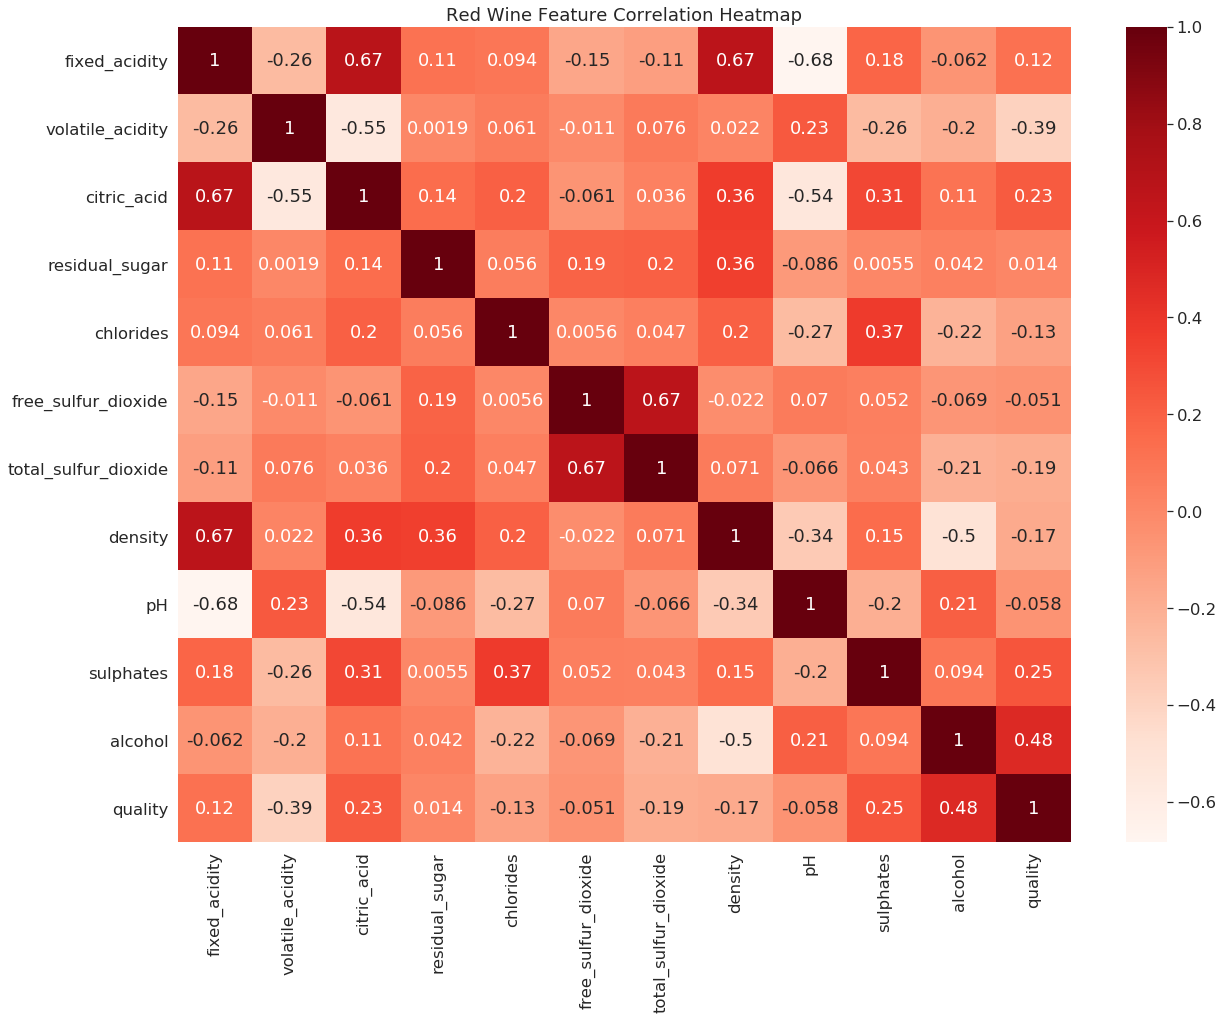

In [0]:
sns.set(font_scale = 1.5)
plt.subplots(figsize = (20, 15))
ax = plt.axes()
ax.set_title('Red Wine Feature Correlation Heatmap')
rCorr = scaledRedDF.corr()
sns.heatmap(rCorr, xticklabels = rCorr.columns.values, yticklabels = rCorr.columns.values, cmap = 'Reds', annot = True)
plt.show()

In [0]:
display(rCorr)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1.0,-0.2561308947703813,0.6717034347641054,0.11477672449492174,0.0937051863213053,-0.153794192864825,-0.11318144304548111,0.6680472921189724,-0.6829781945685274,0.18300566393215334,-0.0616682706281512,0.12405164911322557
-0.2561308947703813,1.0,-0.5524956845595788,0.0019178819627907152,0.061297772476461364,-0.010503827006591778,0.0764700048209281,0.022026232195215757,0.234937294407392,-0.2609866852832886,-0.20228802715325628,-0.3905577802640074
0.6717034347641054,-0.5524956845595788,1.0,0.14357716157031444,0.20382291382904233,-0.06097812919230478,0.035533023931161485,0.36494717521125086,-0.5419041447395069,0.3127700438544177,0.1099032466415669,0.22637251431804428
0.11477672449492174,0.0019178819627907152,0.14357716157031444,1.0,0.05560953520353225,0.18704899510428719,0.20302788169710184,0.35528337098337753,-0.08565242221887144,0.005527121339138307,0.04207543720973146,0.013731637340066528
0.0937051863213053,0.061297772476461364,0.20382291382904233,0.05560953520353225,1.0,0.005562147004781116,0.047400468259075075,0.20063232664151187,-0.265026131173226,0.3712604812854269,-0.22114054478828332,-0.1289065599300539
-0.153794192864825,-0.010503827006591778,-0.06097812919230478,0.18704899510428719,0.005562147004781116,1.0,0.6676664504810226,-0.021945831163489218,0.0703774985049414,0.051657571842828674,-0.06940835356499997,-0.05065605724427679
-0.11318144304548111,0.0764700048209281,0.035533023931161485,0.20302788169710184,0.047400468259075075,0.6676664504810226,1.0,0.07126947620310298,-0.06649455901285566,0.042946836239538315,-0.20565394374367127,-0.18510028892653999
0.6680472921189724,0.022026232195215757,0.36494717521125086,0.35528337098337753,0.20063232664151187,-0.021945831163489218,0.07126947620310298,1.0,-0.34169933478502884,0.1485064117207851,-0.49617977024170185,-0.1749192277833507
-0.6829781945685274,0.234937294407392,-0.5419041447395069,-0.08565242221887144,-0.265026131173226,0.0703774985049414,-0.06649455901285566,-0.34169933478502884,1.0,-0.1966476023043703,0.20563250850549758,-0.0577313912053824
0.18300566393215334,-0.2609866852832886,0.3127700438544177,0.005527121339138307,0.3712604812854269,0.051657571842828674,0.042946836239538315,0.1485064117207851,-0.1966476023043703,1.0,0.09359475041046762,0.2513970790692641


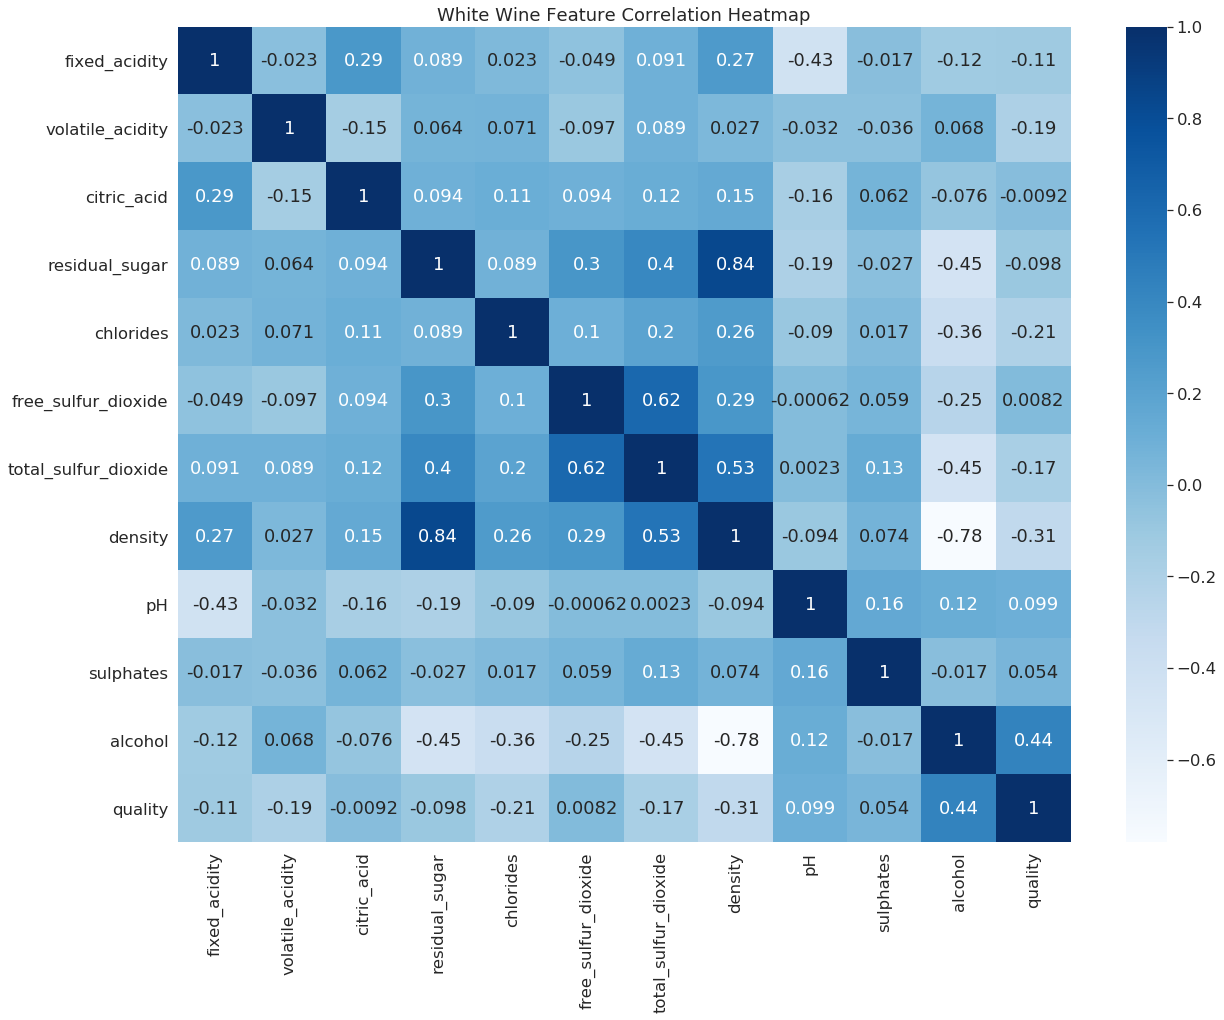

In [0]:
plt.subplots(figsize = (20, 15))
ax = plt.axes()
ax.set_title('White Wine Feature Correlation Heatmap')
wCorr = scaledWhiteDF.corr()
sns.heatmap(wCorr, xticklabels = wCorr.columns.values, yticklabels = wCorr.columns.values, cmap = 'Blues', annot = True)
plt.show()

In [0]:
display(wCorr)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1.0,-0.02269729014664739,0.28918069769367233,0.08902070136217266,0.023085643656347826,-0.04939585908117313,0.09106975615864121,0.2653310138391884,-0.4258582909913831,-0.017142985021137345,-0.12088112319453316,-0.11366283071301997
-0.02269729014664739,1.0,-0.14947181064857426,0.06428606009099598,0.07051157147938468,-0.09701193927796,0.08926050355177917,0.027113845462434588,-0.03191536827348932,-0.03572814690581507,0.06771794277504412,-0.19472296892113702
0.28918069769367233,-0.14947181064857426,1.0,0.09421162429049317,0.11436444838681675,0.09407722101469426,0.12113079766441616,0.1495025705700202,-0.1637482114006219,0.06233094028523208,-0.07572873005717784,-0.00920909088397525
0.08902070136217266,0.06428606009099598,0.09421162429049317,1.0,0.08868453594122577,0.2990983536935158,0.4014393111599269,0.8389664549045884,-0.19413345399025722,-0.026664365853858413,-0.45063122203172834,-0.09757682889469409
0.023085643656347826,0.07051157147938468,0.11436444838681675,0.08868453594122577,1.0,0.10139235214132897,0.1989102996450549,0.2572113204364345,-0.09043945597598203,0.01676288370817563,-0.36018871210816206,-0.20993441094676094
-0.04939585908117313,-0.09701193927796,0.09407722101469426,0.2990983536935158,0.10139235214132897,1.0,0.6155009650098328,0.2942104108843072,-6.177961403312264E-4,0.059217245825262645,-0.2501039414835295,0.008158067123436042
0.09106975615864121,0.08926050355177917,0.12113079766441616,0.4014393111599269,0.1989102996450549,0.6155009650098328,1.0,0.5298813238786125,0.002320971768277778,0.13456236692980916,-0.44889210206133806,-0.17473721759706443
0.2653310138391884,0.027113845462434588,0.1495025705700202,0.8389664549045884,0.2572113204364345,0.2942104108843072,0.5298813238786125,1.0,-0.0935914934552451,0.07449314851167604,-0.7801376214255534,-0.3071233127347314
-0.4258582909913831,-0.03191536827348932,-0.1637482114006219,-0.19413345399025722,-0.09043945597598203,-6.177961403312264E-4,0.002320971768277778,-0.0935914934552451,1.0,0.15595149727965377,0.12143209874912882,0.09942724573666642
-0.017142985021137345,-0.03572814690581507,0.06233094028523208,-0.026664365853858413,0.01676288370817563,0.059217245825262645,0.13456236692980916,0.07449314851167604,0.15595149727965377,1.0,-0.017432771855951597,0.05367787713279238


## Difference in Correlations Heat Map 

The darker the square, the larger the feature relationship is between red and white wines.

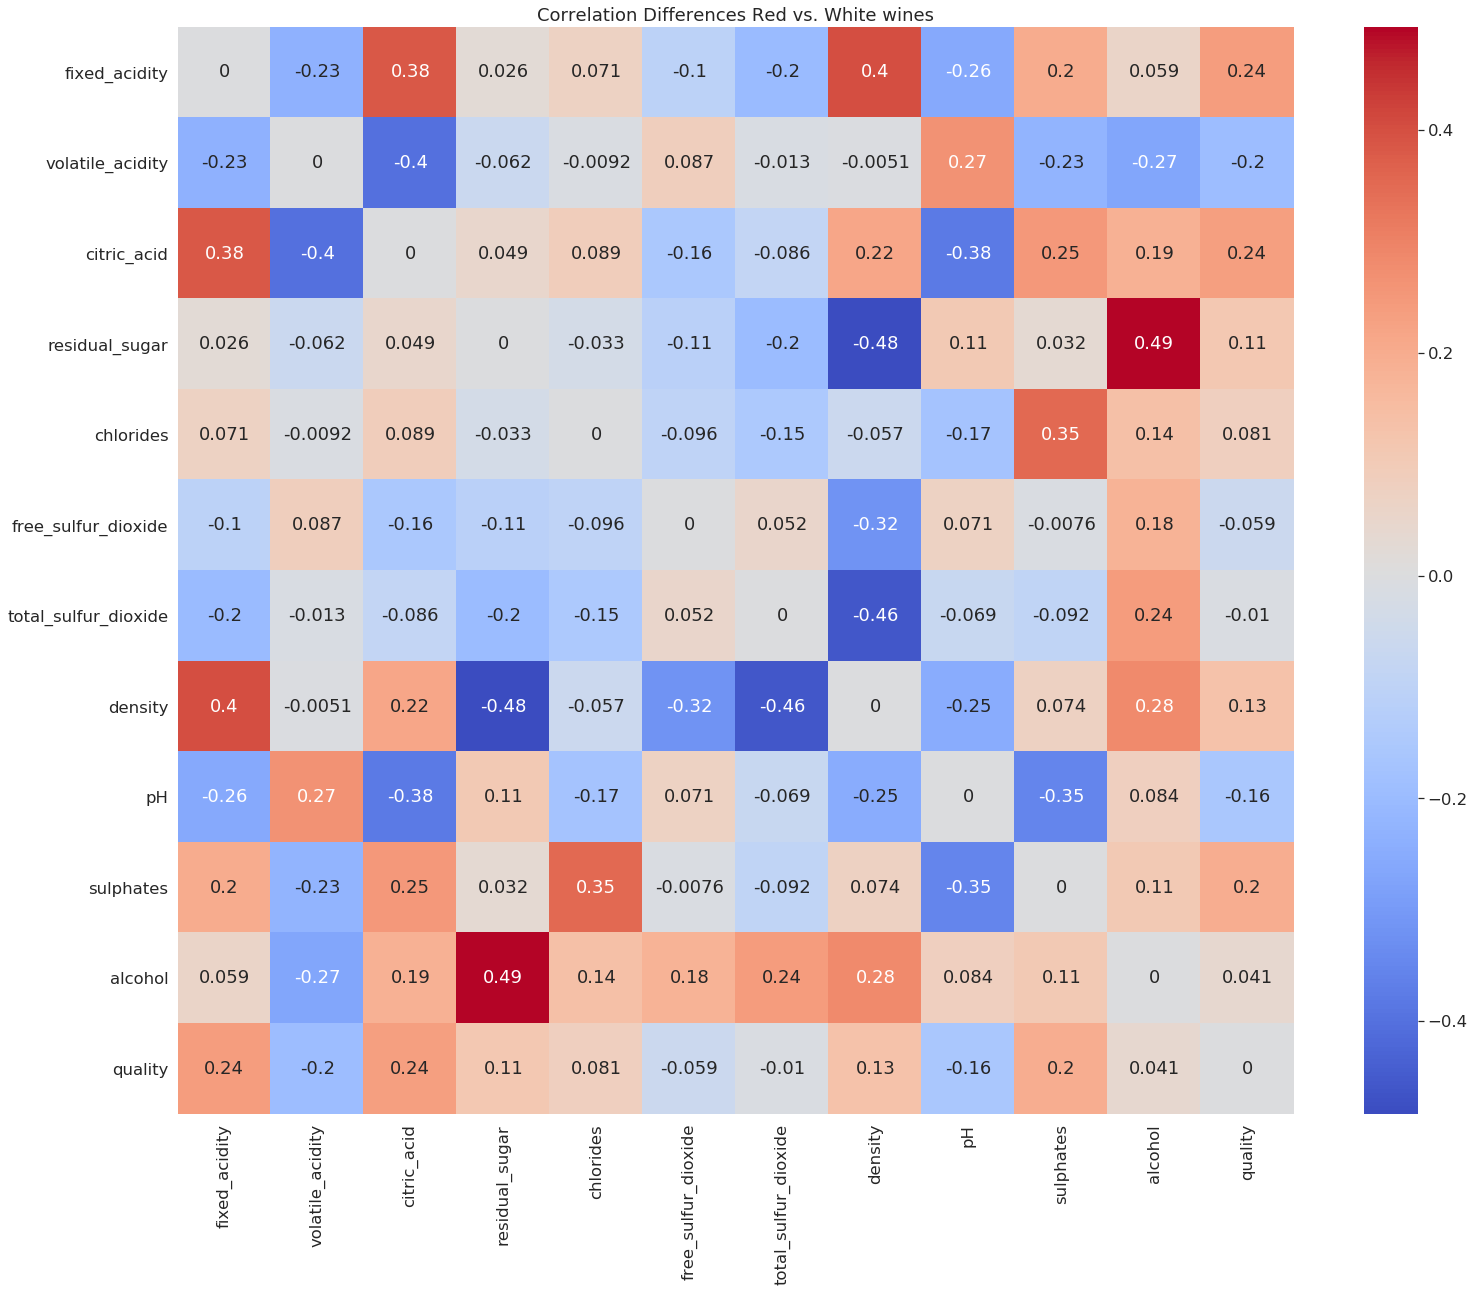

In [0]:
diffCorr = rCorr - wCorr
plt.subplots(figsize = (25, 20))
ax = plt.axes()
ax.set_title('Correlation Differences Red vs. White wines')
sns.heatmap(diffCorr, xticklabels = diffCorr.columns.values, yticklabels = diffCorr.columns.values, cmap = 'coolwarm', annot = True)
plt.show()

## Are The Features Normally Distributed?

## Red Wine

In [0]:
from scipy import stats 

isNormDF = pd.DataFrame(columns = ['feature', 'p-value', 'is_normal'])

def is_normal(x, colName, a = 0.05):
  global isNormDF
  temp = [colName]
  chiquared, p = stats.normaltest(x)
  isNormal = p > a
  temp.append(p)
  temp.append(isNormal)
  tempSeries = pd.Series(temp, index = isNormDF.columns)
  isNormDF = isNormDF.append(tempSeries, ignore_index = True)
  print(temp)
  print('Feature: ' + colName)
  print('p value: ' + str(p))
  print('Is normal: ' + str(isNormal) + '\n')

for column in redDF.columns:
  if column == 'quality':
    continue
  is_normal(np.array(redDF[column]), column)

display(isNormDF)

['fixed_acidity', 1.7528277735470436e-49, False]
Feature: fixed_acidity
p value: 1.7528277735470436e-49
Is normal: False

['volatile_acidity', 7.192589039756692e-32, False]
Feature: volatile_acidity
p value: 7.192589039756692e-32
Is normal: False

['citric_acid', 9.662822259281018e-34, False]
Feature: citric_acid
p value: 9.662822259281018e-34
Is normal: False

['residual_sugar', 0.0, False]
Feature: residual_sugar
p value: 0.0
Is normal: False

['chlorides', 0.0, False]
Feature: chlorides
p value: 0.0
Is normal: False

['free_sulfur_dioxide', 4.779365332171477e-75, False]
Feature: free_sulfur_dioxide
p value: 4.779365332171477e-75
Is normal: False

['total_sulfur_dioxide', 1.433890834343538e-106, False]
Feature: total_sulfur_dioxide
p value: 1.433890834343538e-106
Is normal: False

['density', 2.1473202738102222e-07, False]
Feature: density
p value: 2.1473202738102222e-07
Is normal: False

['pH', 4.8468645347727716e-08, False]
Feature: pH
p value: 4.8468645347727716e-08
Is normal: False

['sulphates', 1.1759065222978855e-197, False]
Feature: sulphates
p value: 1.1759065222978855e-197
Is normal: False

['alcohol', 3.3163288473185496e-34, False]
Feature: alcohol
p value: 3.3163288473185496e-34
Is normal: False

feature,p-value,is_normal
fixed_acidity,1.7528277735470436E-49,false
volatile_acidity,7.192589039756692E-32,false
citric_acid,9.662822259281018E-34,false
residual_sugar,0.0,false
chlorides,0.0,false
free_sulfur_dioxide,4.779365332171477E-75,false
total_sulfur_dioxide,1.433890834343538E-106,false
density,2.1473202738102222E-7,false
pH,4.8468645347727716E-8,false
sulphates,1.1759065222978855E-197,false


## White Wine

In [0]:
isNormWhiteDF = pd.DataFrame(columns = ['feature', 'p-value', 'is_normal'])

def is_normal(x, colName, a = 0.05):
  global isNormWhiteDF
  temp = [colName]
  chiquared, p = stats.normaltest(x)
  isNormal = p > a
  temp.append(p)
  temp.append(isNormal)
  tempSeries = pd.Series(temp, index = isNormWhiteDF.columns)
  isNormWhiteDF = isNormWhiteDF.append(tempSeries, ignore_index = True)
  print(temp)
  print('Feature: ' + colName)
  print('p value: ' + str(p))
  print('Is normal: ' + str(isNormal) + '\n')

for column in whiteDF.columns:
  if column == 'quality':
    continue
  is_normal(np.array(whiteDF[column]), column)

display(isNormWhiteDF)

['fixed_acidity', 5.192296946299217e-118, False]
Feature: fixed_acidity
p value: 5.192296946299217e-118
Is normal: False

['volatile_acidity', 0.0, False]
Feature: volatile_acidity
p value: 0.0
Is normal: False

['citric_acid', 0.0, False]
Feature: citric_acid
p value: 0.0
Is normal: False

['residual_sugar', 1.3781731594418583e-228, False]
Feature: residual_sugar
p value: 1.3781731594418583e-228
Is normal: False

['chlorides', 0.0, False]
Feature: chlorides
p value: 0.0
Is normal: False

['free_sulfur_dioxide', 0.0, False]
Feature: free_sulfur_dioxide
p value: 0.0
Is normal: False

['total_sulfur_dioxide', 4.330752711423771e-35, False]
Feature: total_sulfur_dioxide
p value: 4.330752711423771e-35
Is normal: False

['density', 1.0995470514104443e-307, False]
Feature: density
p value: 1.0995470514104443e-307
Is normal: False

['pH', 1.0892373353367272e-42, False]
Feature: pH
p value: 1.0892373353367272e-42
Is normal: False

['sulphates', 8.19207367045622e-161, False]
Feature: sulphates
p value: 8.19207367045622e-161
Is normal: False

['alcohol', 3.6093322661783645e-94, False]
Feature: alcohol
p value: 3.6093322661783645e-94
Is normal: False

feature,p-value,is_normal
fixed_acidity,5.192296946299217E-118,false
volatile_acidity,0.0,false
citric_acid,0.0,false
residual_sugar,1.3781731594418583E-228,false
chlorides,0.0,false
free_sulfur_dioxide,0.0,false
total_sulfur_dioxide,4.330752711423771E-35,false
density,1.0995470514104443E-307,false
pH,1.0892373353367272E-42,false
sulphates,8.19207367045622E-161,false
